# 10 Boxes analysis.

In [1]:
from CoLoRe_corrf_analysis.plot_methods import Plots
from CoLoRe_corrf_analysis.file_funcs import FileFuncs
from CoLoRe_corrf_analysis.fitter import Fitter
from CoLoRe_corrf_analysis.read_colore import ComputeModelsCoLoRe

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

We need to provide the following files to the theory object:

In [3]:
theory_path=Path('/global/cscratch1/sd/damonge/CoLoRe_sims/sim1000')
bias_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/BzBlue.txt')
nz_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/NzBlue.txt')
pk_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/Pk_CAMB_test.dat')

Create theory object:

In [4]:
theory = ComputeModelsCoLoRe(
    box_path=theory_path,
    source=2,
    nz_filename=nz_filename,
    pk_filename=pk_filename,
    param_cfg_filename='/global/cscratch1/sd/damonge/CoLoRe_sims/sim1000/out_params.cfg',
    bias_filename=bias_filename,
    apply_lognormal=True)

Read boxes output. We will use the analysis of the 10 boxes here: sim1000-sim1009

In [17]:
boxes_path=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/analysis')

zmin=0.5
zmax=0.7
rsd=True

sub_boxes = FileFuncs.mix_sims(
    FileFuncs.get_full_path(boxes_path,
                            rsd=rsd,
                            rmin=0.1, rmax=200, N_bins=41,
                            zmin=zmin, zmax=zmax, #Also results for 0.7 and 0.9
                            nside=2)
)

FileFuncs.get_available_runs can be used to search for configurations available for the previous cell:

In [18]:
print(FileFuncs.get_available_runs(boxes_path))

+-------+-------+------+------+--------+------+------+-----+
| nside |  rsd  | rmin | rmax | N_bins | zmin | zmax |  N  |
+-------+-------+------+------+--------+------+------+-----+
|   1   |  rsd  | 0.1  | 200  |   41   | 0.7  | 0.9  | 12  |
|   2   |  rsd  | 0.1  | 400  |   41   | 0.7  | 0.9  | 48  |
|   2   |  rsd  | 0.1  | 200  |   41   | 0.6  | 0.9  | 144 |
|   2   |  rsd  | 0.1  | 200  |   41   |  0   | 1.42 | 48  |
|   2   |  rsd  | 0.1  | 200  |   41   | 0.9  | 1.1  | 480 |
|   2   |  rsd  | 0.1  | 200  |   41   | 0.3  | 0.5  | 480 |
|   2   |  rsd  | 0.1  | 200  |   41   | 1.1  | 1.4  | 48  |
|   2   |  rsd  | 0.1  | 200  |   41   | 0.5  | 0.7  | 480 |
|   2   |  rsd  | 0.1  | 200  |   41   | 0.1  | 0.3  | 48  |
|   2   |  rsd  | 0.1  | 200  |   41   | 0.7  | 0.9  | 480 |
|   2   |  rsd  | 0.1  | 300  |   41   | 0.7  | 0.9  | 48  |
|   2   | norsd | 0.1  |  50  |   20   | 0.5  | 0.7  | 192 |
|   2   | norsd | 0.1  |  50  |   5    | 0.5  | 0.7  | 192 |
|   2   | norsd | 0.1  |

We should have 480 **sub**-boxes for analysis, that is 48 pixels for each of the 10 CoLoRe boxes.

In [19]:
len(sub_boxes)

480

We can easily make plots using Plots.plot_data, Plots.plot_theory. These methods are defined in module_files_plots.Plots

In [20]:
z = theory.get_zeff(zmin=zmin, zmax=zmax) #
print(z)

0.5990093404246088


In [29]:
bias = theory.bias(z)
bias

array(1.36669002)

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


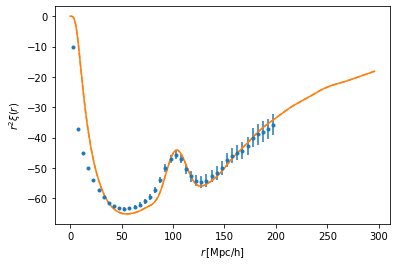

In [40]:
fig, ax = plt.subplots()
pole=2 

Plots.plot_data(pole=pole, boxes=sub_boxes, ax=ax, plot_args=dict(c='C0', label='data'))
Plots.plot_theory(pole=pole, theory=theory, z=z, bias=bias, rsd=rsd, ax=ax, plot_args=dict(c='C1', label='model'))

To simply obtain the data for the plot:

In [41]:
# For theory
r = theory.r
xi = theory.get_npole(n=2, z=z, rsd=rsd, bias=bias, rsd2=None, bias2=None, 
                         smooth_factor=1, smooth_factor_rsd=1, smooth_factor_cross=1)

# For data:
r_dat = sub_boxes[0].savg
xis_dat = np.array([box.compute_npole(2) for box in sub_boxes])
xis_mean = xis_dat.mean(axis=0)
xis_err = xis_dat.std(ddof=1, axis=0)/np.sqrt(len(sub_boxes))

# alternatively: xis_mean, xis_err = Plots.get_xi(2, sub_boxes)

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


(-5.0, 300.0)

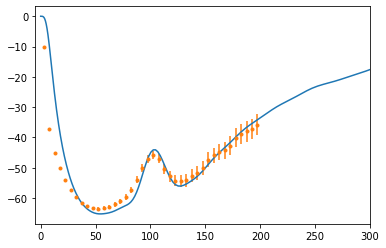

In [33]:
fig, ax = plt.subplots()

ax.plot(r, xi*r**2)

ax.errorbar(r_dat, r_dat**2*xis_mean, r_dat**2*xis_err, fmt='.') 
ax.set_xlim(-5, 300)

# Fitter

To perform a fit, we use the class Fitter from module_files_plots:

In [34]:
fitter = Fitter(boxes=sub_boxes, z=z, theory=theory, poles=[0,2], rsd=rsd, bias0=bias,
    smooth_factor0=1, smooth_factor_rsd0=1, smooth_factor_cross0=1)# put here fitted regions

fitter.run_fit(free_params=['bias'])

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


In [35]:
fitter.out.params

name,value,standard error,relative error,initial value,min,max,vary
bias,1.31646315,9.0301e-04,(0.07%),1.3666900208504704,0.00000000,inf,True
smooth_factor,1.00000000,0.00000000,(0.00%),1,0.00000000,inf,False
smooth_factor_rsd,1.00000000,0.00000000,(0.00%),1,0.00000000,inf,False
smooth_factor_cross,1.00000000,0.00000000,(0.00%),1,0.00000000,inf,False


In [36]:
print(fitter.pars_tab())

| name                |   value |   stderr |   stderror(%) |   init value |   min |   max | vary   |
|---------------------|---------|----------|---------------|--------------|-------|-------|--------|
| bias                |   1.316 |    0.001 |         0.069 |      1.36669 |     0 |   inf | True   |
| smooth_factor       |   1     |    0     |         0     |      1       |     0 |   inf | False  |
| smooth_factor_rsd   |   1     |    0     |         0     |      1       |     0 |   inf | False  |
| smooth_factor_cross |   1     |    0     |         0     |      1       |     0 |   inf | False  |


If more than one parameter is free, we can get the correlation between these values by using.

In [37]:
print(fitter.corrs_tab())

| name   | name   | corr   |
|--------|--------|--------|


We can plot the best fit as well:

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


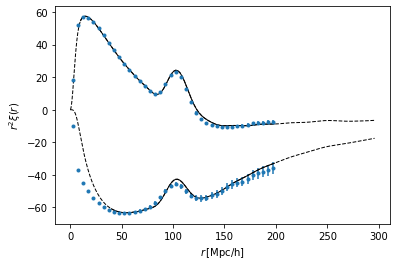

In [42]:
fig, ax = plt.subplots()
pole=2

Plots.plot_data(pole=pole, boxes=sub_boxes, ax=ax, plot_args=dict(c='C0', label='data'))
Plots.plot_best_fit(fitter=fitter, pole=pole, ax=ax, plot_args=dict(c='k', lw=1, label='best fit'))

pole=0

Plots.plot_data(pole=pole, boxes=sub_boxes, ax=ax, plot_args=dict(c='C0', label='data'))
Plots.plot_best_fit(fitter=fitter, pole=pole, ax=ax, plot_args=dict(c='k', lw=1, label='best fit'))